In [1]:
import pandas as pd
import numpy as np

In [2]:
fwd_data = pd.read_csv("dataset.csv")

In [3]:
fwd_data

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956837,5956837,8.418457,0.000095,8.427576,256.570863,4.751543e-26,4.967504,Faint Yellow,3.824532,0.541850,...,2.630130,9.608234e-03,545.990529,Well,21.436974,70.493951,February,8.0,8.0,1
5956838,5956838,7.950573,0.215729,4.677850,292.727780,4.679421e-12,1.842063,Near Colorless,1.181166,2.747241,...,3.555576,1.875424e-11,514.136530,Ground,19.064632,67.052475,September,8.0,6.0,1
5956839,5956839,8.145572,0.000005,7.112877,254.831175,3.150254e-56,0.656923,Colorless,1.769609,1.398686,...,3.127251,1.199405e+00,336.947289,NaN,5.863636,64.086020,January,16.0,11.0,1
5956840,5956840,8.273548,0.001236,10.182408,122.842038,4.226073e-33,0.903032,Light Yellow,0.366909,3.076229,...,2.762962,2.824411e+00,112.458644,NaN,28.034083,18.158372,March,29.0,13.0,1


## Missing values

In [4]:
# getting the number of missing data
missing_values_count = fwd_data.isnull().sum()
missing_values_count

Index                          0
pH                        116054
Iron                       39753
Nitrate                   105725
Chloride                  175531
Lead                       26909
Zinc                      156126
Color                       5739
Turbidity                  49815
Fluoride                  189156
Copper                    199402
Odor                      178891
Sulfate                   197418
Conductivity              163861
Chlorine                   57825
Manganese                 109583
Total Dissolved Solids      1670
Source                     88262
Water Temperature         168233
Air Temperature            29728
Month                      95668
Day                        99603
Time of Day               114519
Target                         0
dtype: int64

In [5]:
# how many total missing values do we have?
total_cells= np.product(fwd_data.shape)
total_missing=missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100

In [7]:
total_missing

2369471

In [14]:
fwd_data['Source'].unique()

array(['NA', 'Lake', 'River', 'Ground', 'Spring', 'Stream', 'Aquifer',
       'Reservoir', 'Well'], dtype=object)

In [7]:
fwd_data['Color'].unique()

array(['Colorless', 'Faint Yellow', 'Light Yellow', 'Near Colorless',
       'Yellow', nan], dtype=object)

In [8]:
fwd_data['Month'].unique()

array(['January', 'November', 'April', 'June', 'March', 'September',
       'May', 'July', 'August', 'October', 'December', 'February', nan],
      dtype=object)

In [17]:
# Replace nan values with 'NA'
fwd_data['Source'] = fwd_data['Source'].fillna('NA')
fwd_data['Color'] = fwd_data['Color'].fillna('NA')
fwd_data['Month'] = fwd_data['Month'].fillna('NA')

In [18]:
fwd_data['Source'].unique()

array(['NA', 'Lake', 'River', 'Ground', 'Spring', 'Stream', 'Aquifer',
       'Reservoir', 'Well'], dtype=object)

In [19]:
fwd_data['Color'].unique()

array(['Colorless', 'Faint Yellow', 'Light Yellow', 'Near Colorless',
       'Yellow', 'NA'], dtype=object)

In [20]:
fwd_data['Month'].unique()

array(['January', 'November', 'April', 'June', 'March', 'September',
       'May', 'July', 'August', 'October', 'December', 'February', 'NA'],
      dtype=object)

## Encoding the data

To convert this column for use in a machine learning model, you'll need to encode the categorical variables as numerical values, since most machine learning algorithms work with numbers.



In [21]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the data
encoded_data_source = encoder.fit_transform(fwd_data['Source'].astype(str))
encoded_data_color = encoder.fit_transform(fwd_data['Color'].astype(str))
encoded_data_month = encoder.fit_transform(fwd_data['Month'].astype(str))

In [22]:
encoded_data_source

array([3, 2, 5, ..., 3, 3, 0])

In [23]:
encoded_data_color

array([0, 1, 2, ..., 0, 2, 2])

In [24]:
encoded_data_month

array([ 4, 10,  4, ...,  4,  7,  6])

Note that the LabelEncoder will assign an integer value to each unique string in the column, with the smallest integer being assigned to the first unique string and so on. In this case, 'Lake' will be encoded as 0, 'River' as 1, and so on.

It's important to note that the integer encoding assigned by the LabelEncoder has a natural ordering. For example, the encoding for 'Lake' is smaller than the encoding for 'River', and so on. This can introduce an artificial ordering between the categories, which may not be appropriate for some machine learning algorithms. To avoid this, you can use one-hot encoding, where each unique category is converted into a new binary column with a value of 0 or 1.



In [25]:
fwd_processed=fwd_data
fwd_processed.head()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,NA,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


In [26]:
# Replace the original column with the encoded data
fwd_processed['Source']=encoded_data_source
fwd_processed['Color']=encoded_data_color
fwd_processed['Month']=encoded_data_month


In [27]:
fwd_processed.head()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,0,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,3,NaN,43.493324,4,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,1,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,2,15.348981,71.220586,10,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,2,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,5,11.643467,44.891330,4,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,4,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,1,10.092392,60.843233,0,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,2,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,6,15.249416,69.336671,6,29.0,7.0,0



## Feature Selection

In [28]:
# Access individual column names
for col in fwd_processed.columns:
    print(col)

Index
pH
Iron
Nitrate
Chloride
Lead
Zinc
Color
Turbidity
Fluoride
Copper
Odor
Sulfate
Conductivity
Chlorine
Manganese
Total Dissolved Solids
Source
Water Temperature
Air Temperature
Month
Day
Time of Day
Target


In [29]:
quality_features=['pH','Iron','Nitrate','Chloride','Lead','Zinc','Color','Turbidity','Fluoride','Copper','Odor','Sulfate','Conductivity','Chlorine','Manganese','Total Dissolved Solids','Source','Water Temperature','Air Temperature','Month','Day','Time of Day']


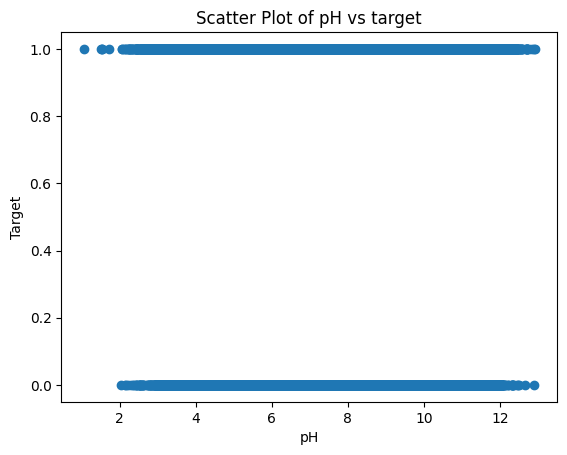

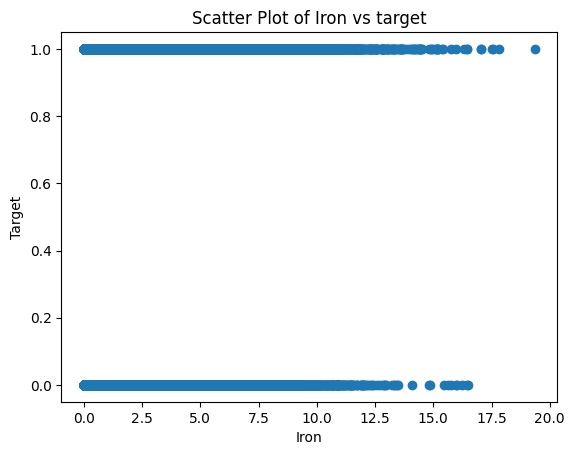

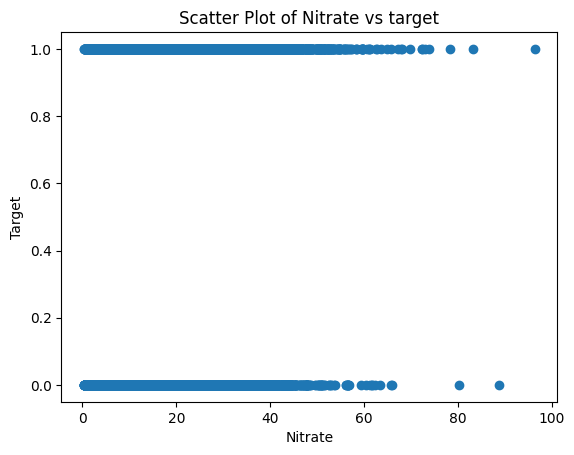

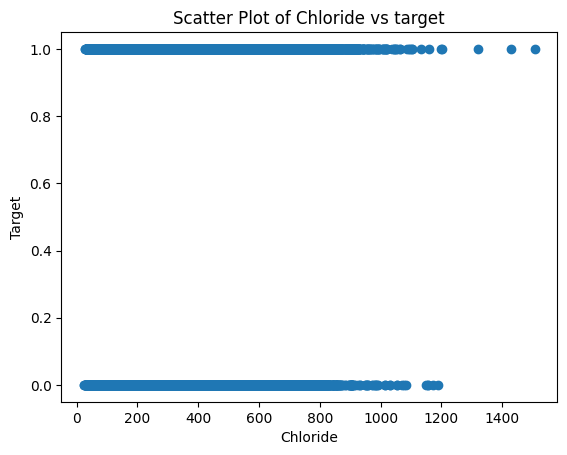

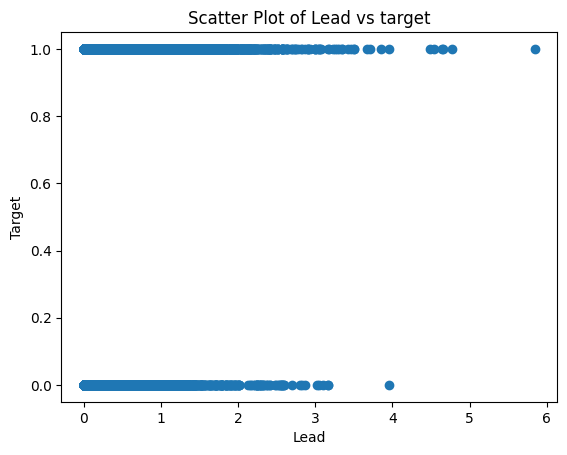

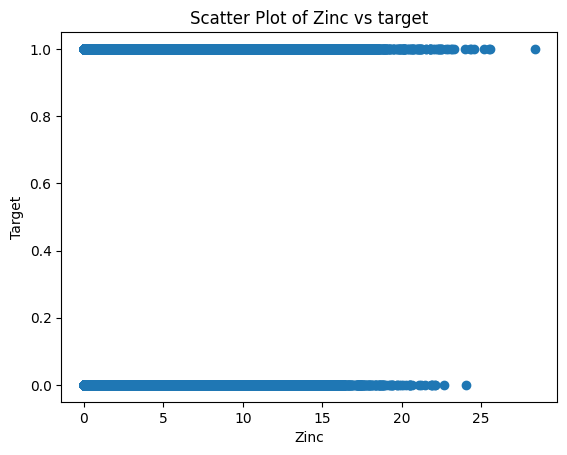

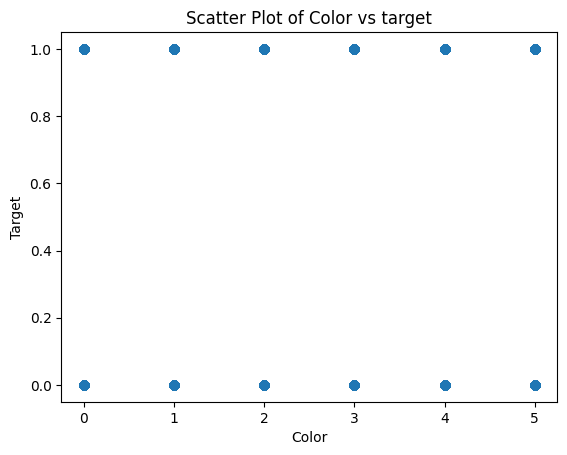

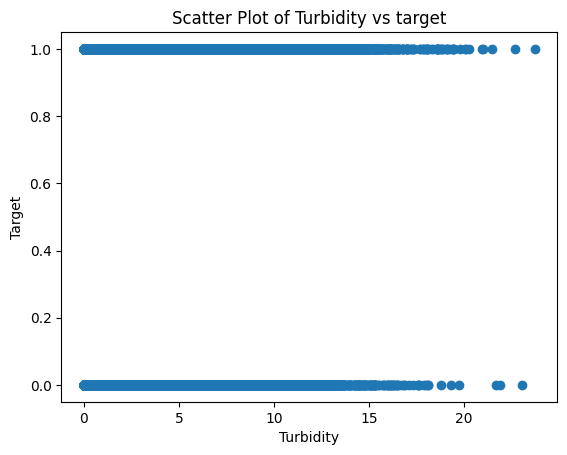

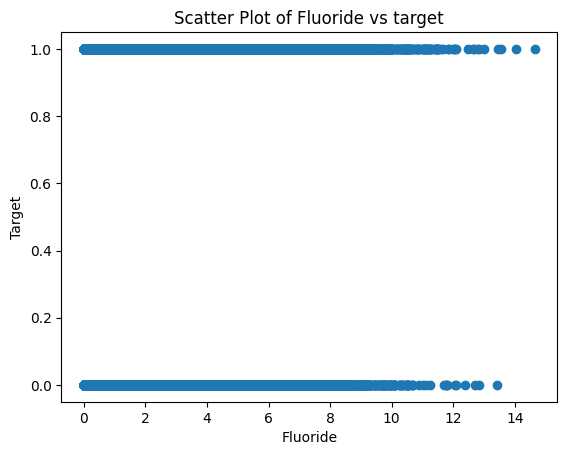

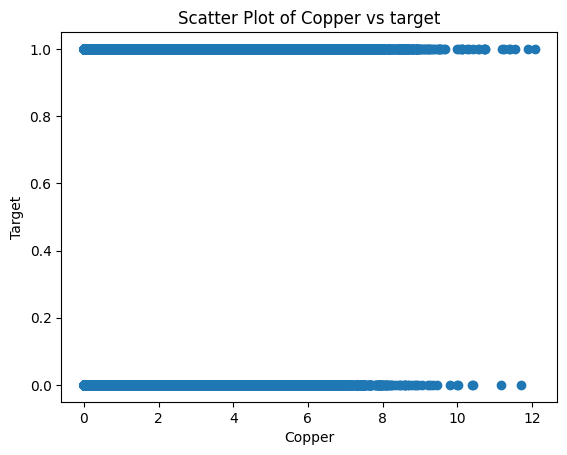

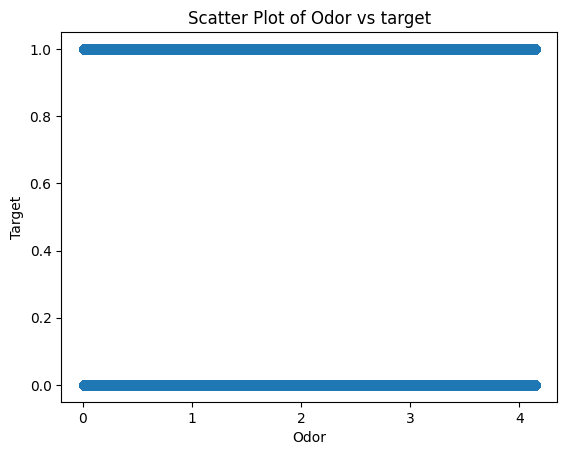

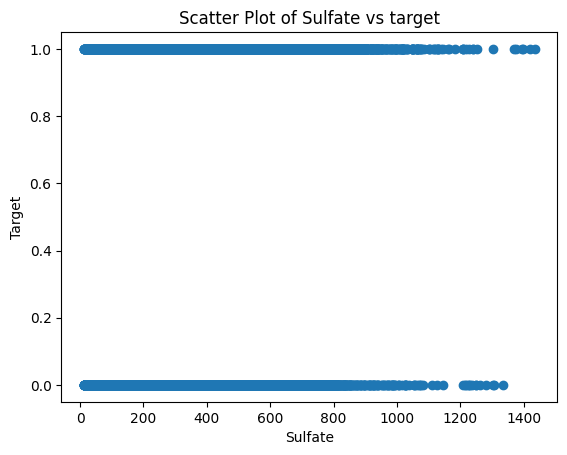

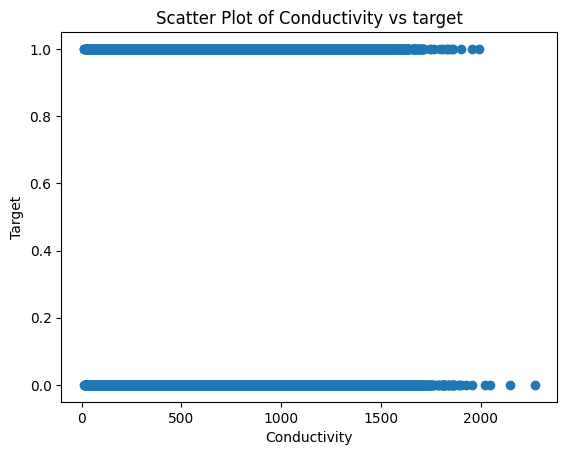

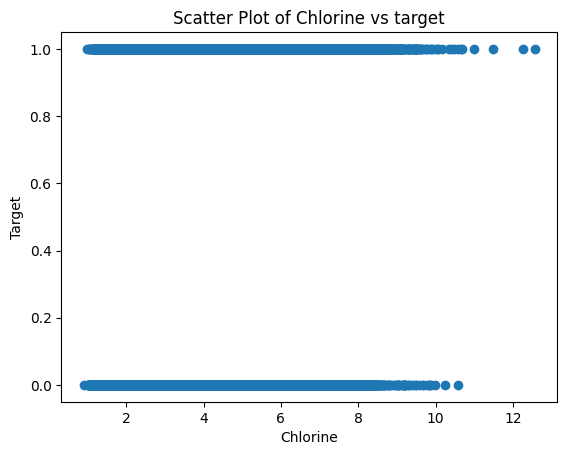

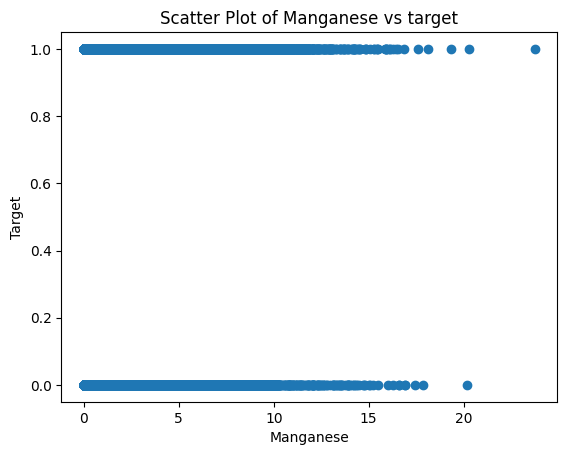

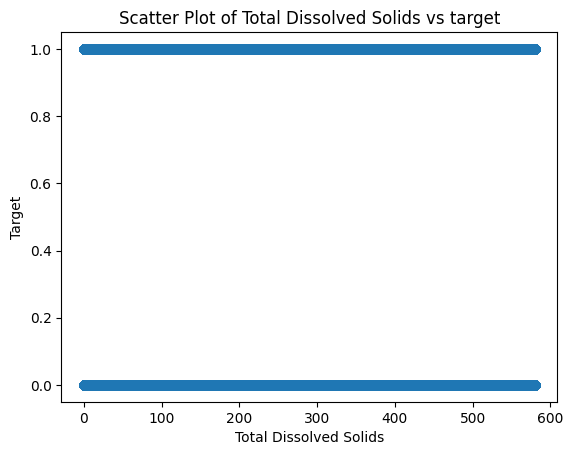

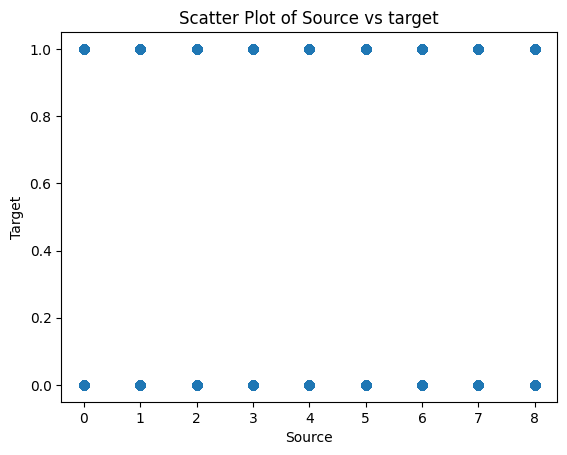

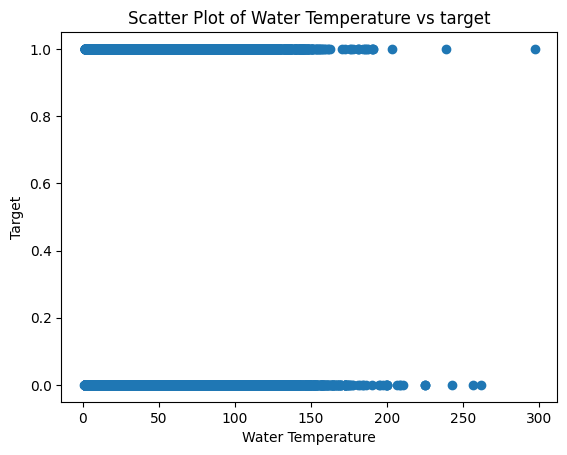

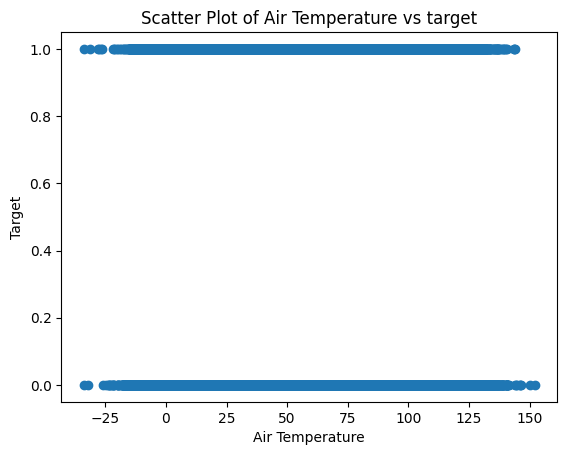

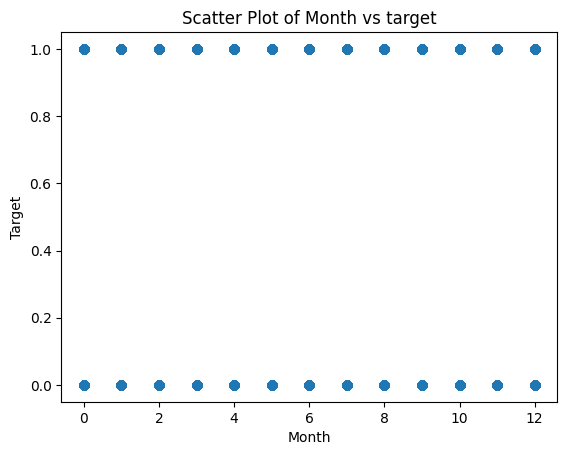

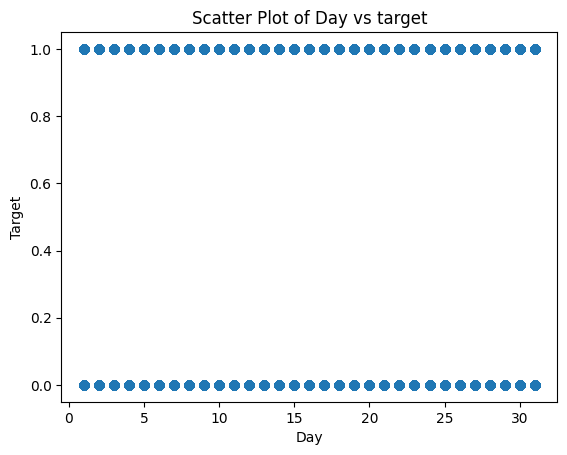

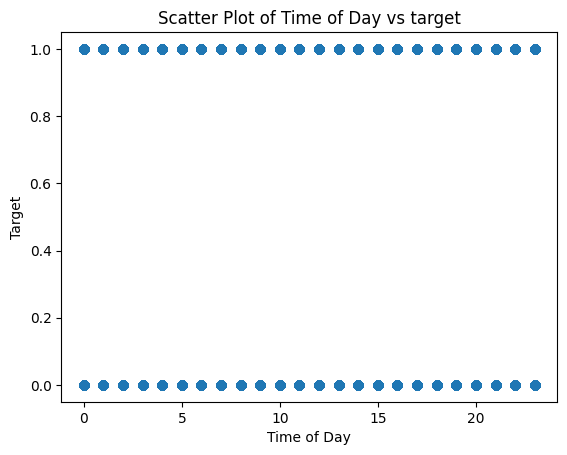

In [31]:
import matplotlib.pyplot as plt

for col in quality_features:
    plt.scatter(fwd_processed[col], fwd_processed['Target'])
    plt.xlabel(col)
    plt.ylabel('Target')
    plt.title(f'Scatter Plot of {col} vs target')
    plt.show()

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/numpy/lib/histograms.py:837: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/numpy/lib/histograms.py:838: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


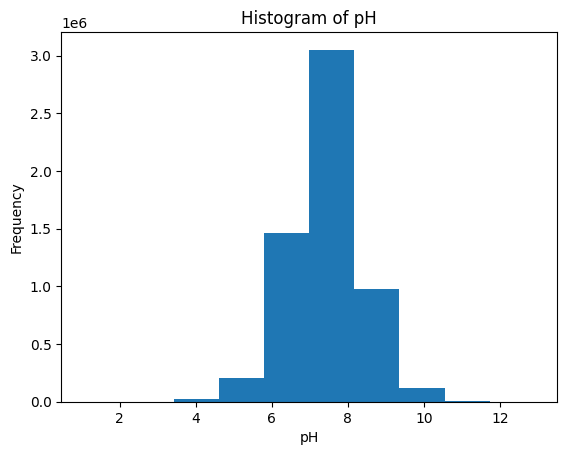

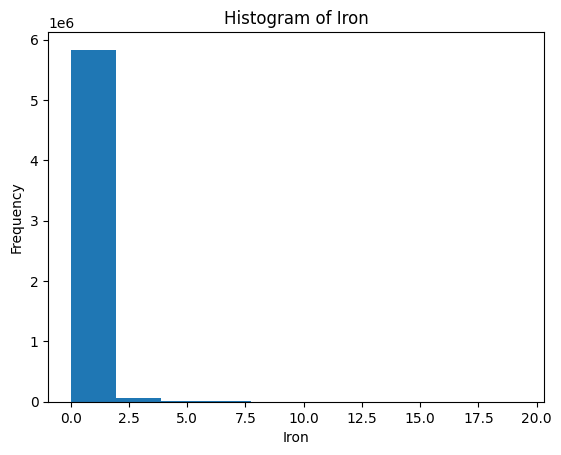

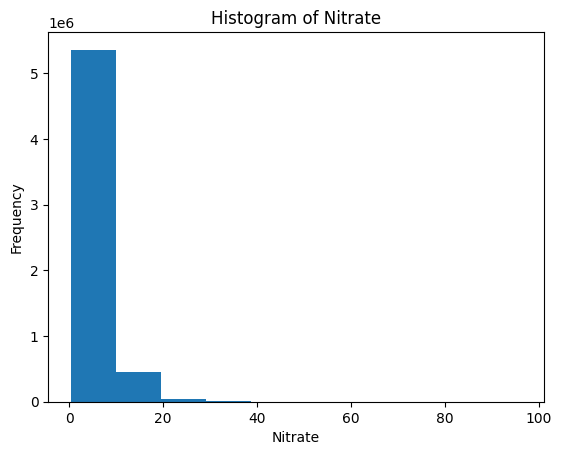

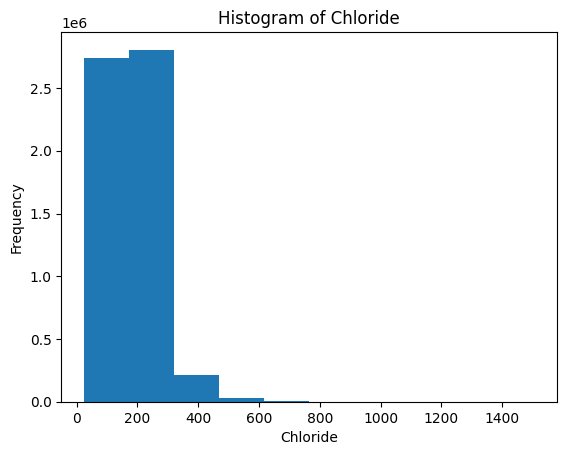

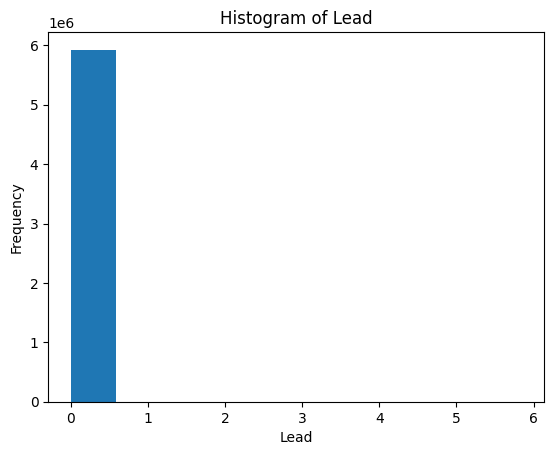

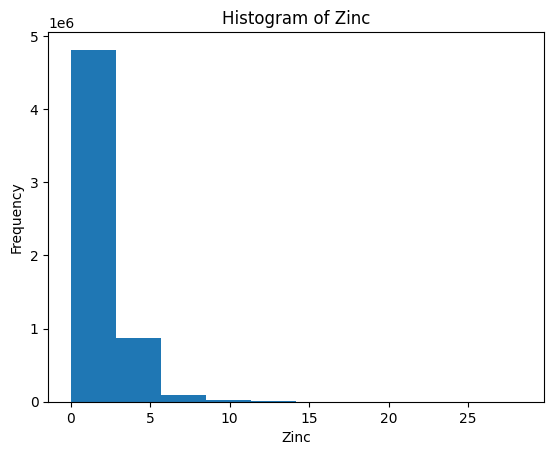

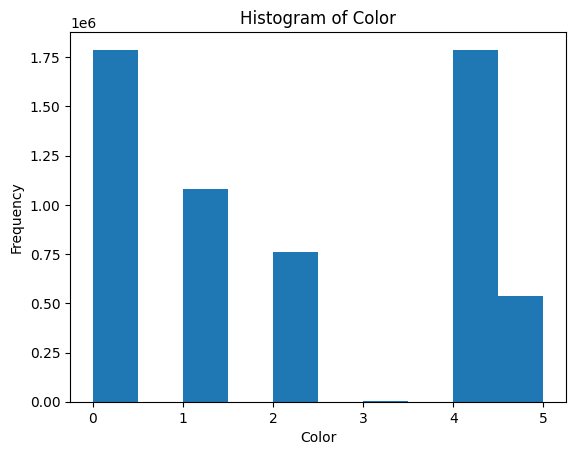

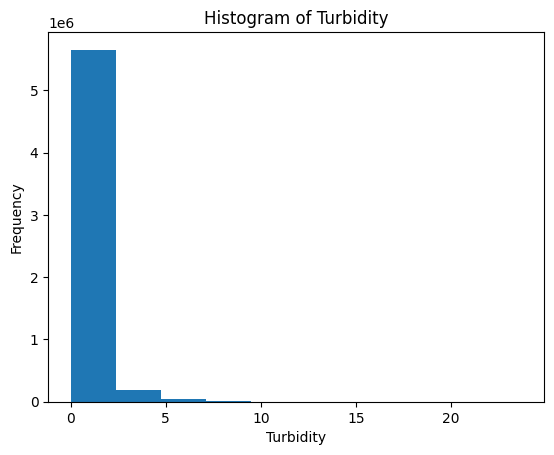

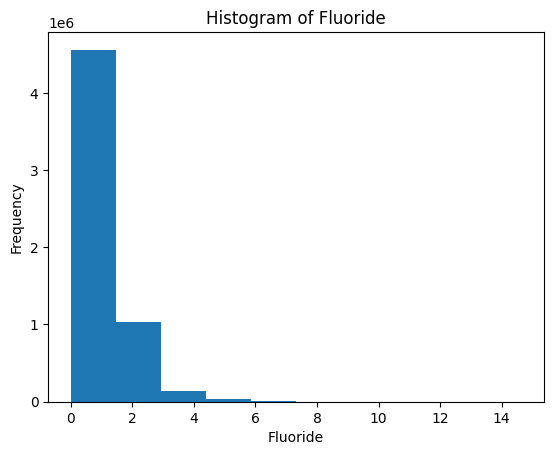

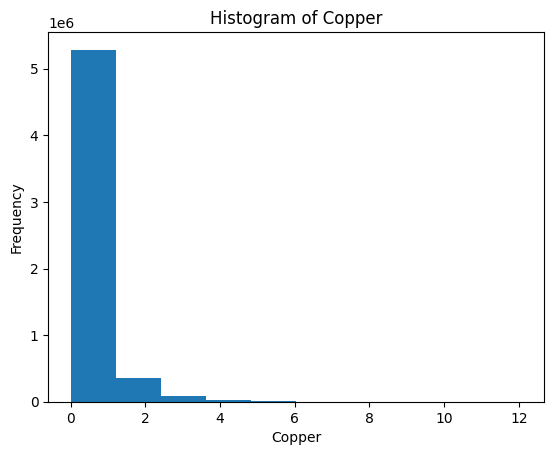

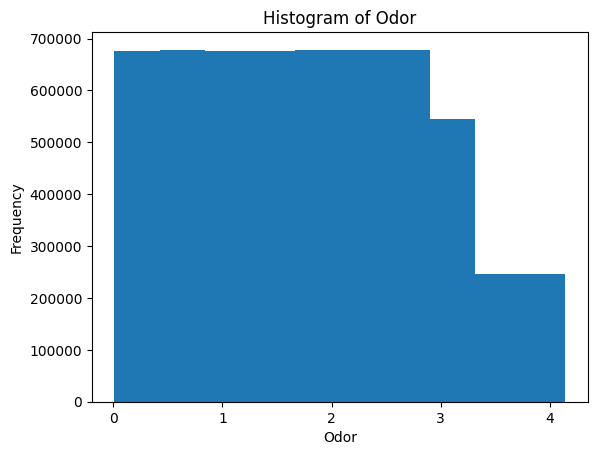

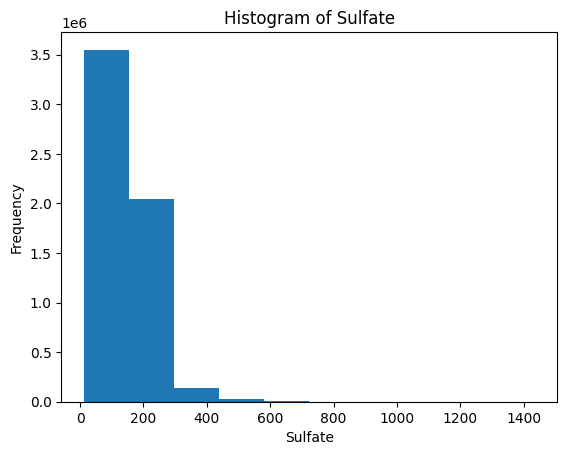

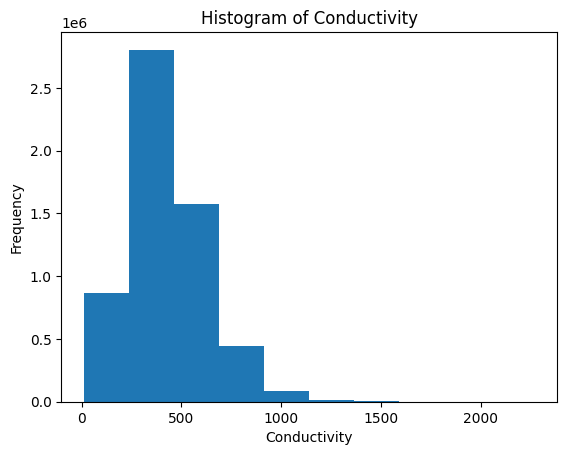

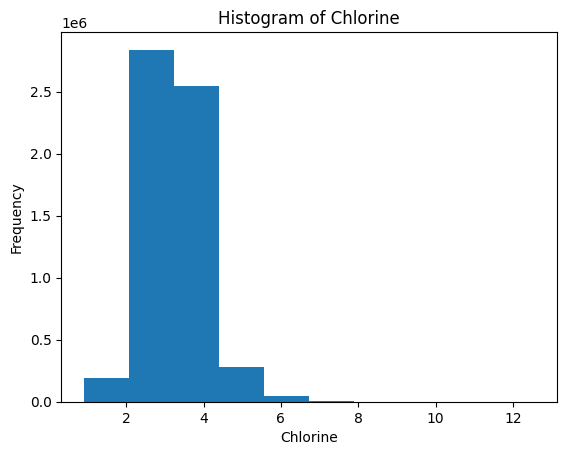

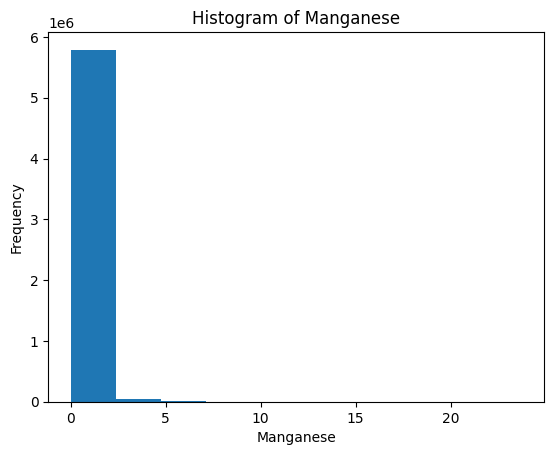

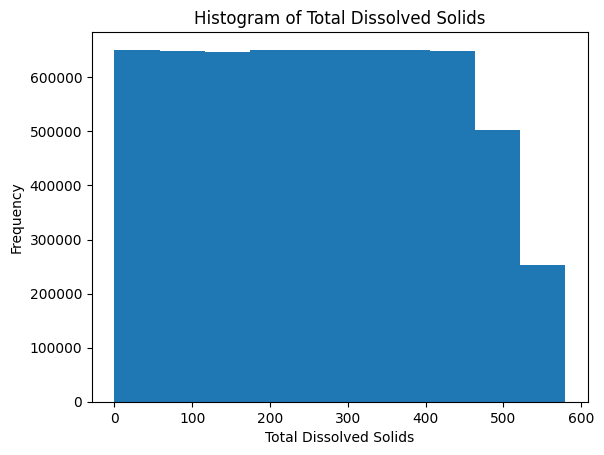

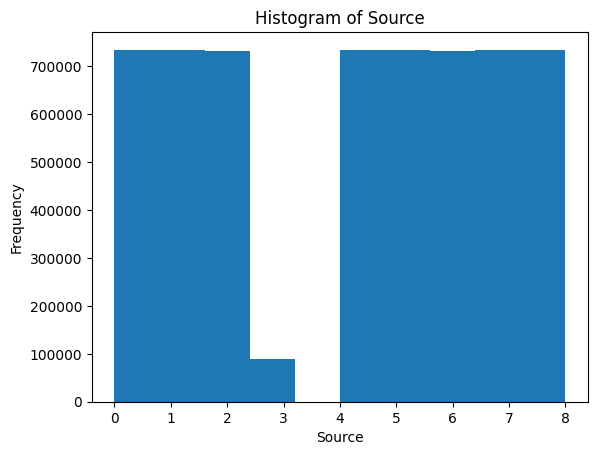

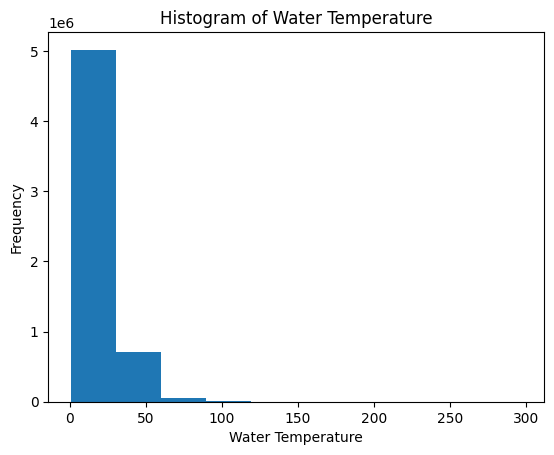

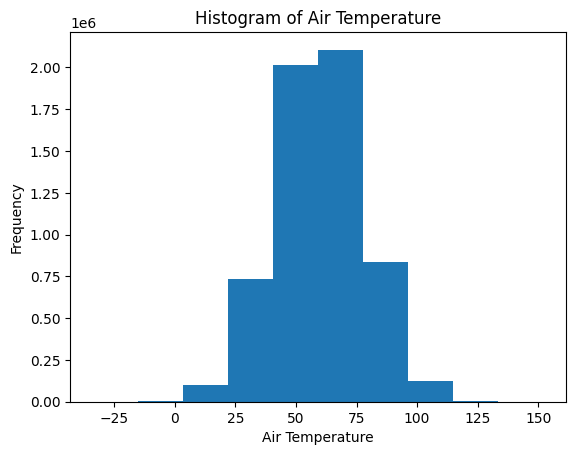

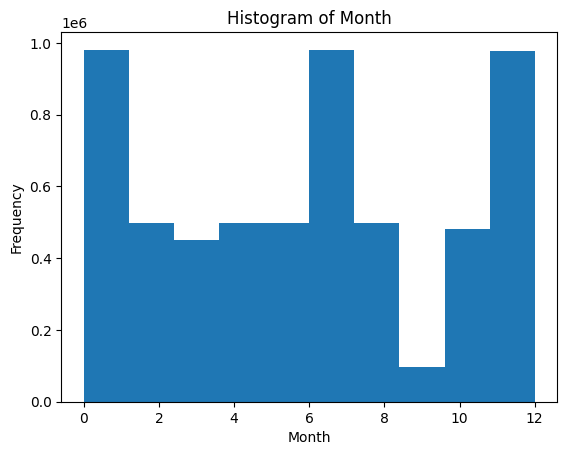

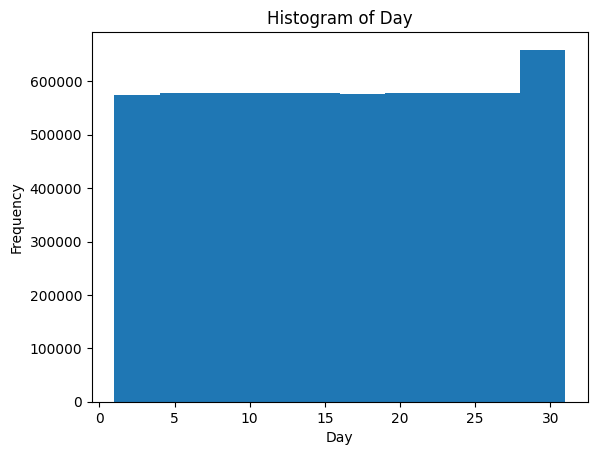

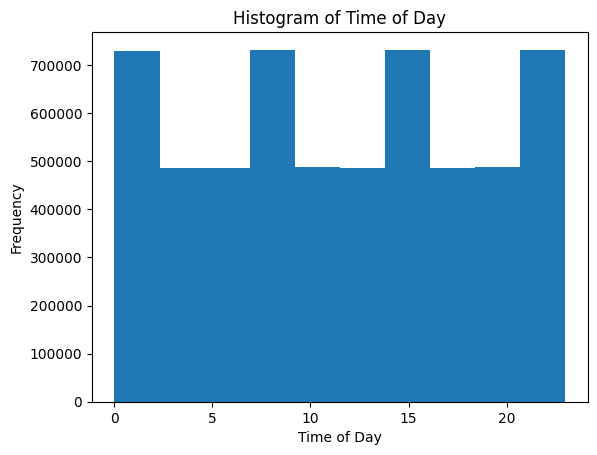

In [32]:
# Plot a histogram for each column
for col in quality_features:
    plt.hist(fwd_processed[col])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

In [34]:

# Replace nan values with the mean of each column
for col in quality_features:
    mean = fwd_processed[col].mean()
    fwd_processed[col].fillna(mean, inplace=True)

In [35]:
fwd_processed.head()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,0,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,3,19.129818,43.493324,4,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,1,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,2,15.348981,71.220586,10,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,2,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,5,11.643467,44.891330,4,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,4,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,1,10.092392,60.843233,0,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,2,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,6,15.249416,69.336671,6,29.0,7.0,0


In [ ]:
# Write the dataframe to a CSV file
fwd_processed.to_csv('processed_data.csv', index=False)